In [1]:
import daft
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

In [2]:
COLOR_VAR = "#AEC7E8"
COLOR_PRIOR = "#0000FF"
COLOR_FACTOR_DEPTH = "#F0E442"
COLOR_FACTOR_HEADING = "#D55E00"
COLOR_FACTOR_GPS = "#009E73"
COLOR_FACTOR_DVL = "#9400D3"
COLOR_FACTOR_IMU = "#000000"
COLOR_FACTOR_RW = "#FFFFFF"

style_var = {"facecolor": COLOR_VAR, "edgecolor": "black"}
style_prior = {"facecolor": COLOR_PRIOR, "edgecolor": "black"}
style_factor_depth = {"facecolor": COLOR_FACTOR_DEPTH, "edgecolor": "black"}
style_factor_heading = {"facecolor": COLOR_FACTOR_HEADING, "edgecolor": "black"}
style_factor_gps = {"facecolor": COLOR_FACTOR_GPS, "edgecolor": "black"}
style_factor_dvl = {"facecolor": COLOR_FACTOR_DVL, "edgecolor": "black"}
style_factor_imu = {"facecolor": COLOR_FACTOR_IMU, "edgecolor": "black"}
style_factor_rw = {"facecolor": COLOR_FACTOR_RW, "edgecolor": "black"}

In [3]:
pgm = daft.PGM(directed=False)

col_spacing = 1.5
start_x = 2.0
prior_dist = 0.8

pgm.add_node("px", "$f^0_\\mathbf{{x}}$", start_x - prior_dist, 3, fixed=True, offset=[0, 3], plot_params=style_prior)
pgm.add_node("pv", "$f^0_\\mathbf{{v}}$", start_x - prior_dist, 2, fixed=True, offset=[0, 3], plot_params=style_prior)
pgm.add_node("pb", "$f^0_\\mathbf{{b}}$", start_x - prior_dist, 1, fixed=True, offset=[0, 3], plot_params=style_prior)

for i in range(4):
    x_pos = start_x + (i * col_spacing)
    
    pgm.add_node(f"x{i}", f"$\\mathbf{{x}}_{{{i}}}$", x_pos, 3, plot_params=style_var)
    pgm.add_node(f"v{i}", f"$\\mathbf{{v}}_{{{i}}}$", x_pos, 2, plot_params=style_var)
    pgm.add_node(f"b{i}", f"$\\mathbf{{b}}_{{{i}}}$", x_pos, 1, plot_params=style_var)

pgm.add_edge("px", "x0")
pgm.add_edge("pv", "v0")
pgm.add_edge("pb", "b0")

for i in range(4):
    x_pos = start_x + (i * col_spacing)
    
    pgm.add_node(f"depth{i}", f"$f^z_{i}$", x_pos - 0.4, 3.4, fixed=True, plot_params=style_factor_depth, offset=[0, 3])
    pgm.add_edge(f"x{i}", f"depth{i}")

    pgm.add_node(f"heading{i}", f"$f^\\psi_{i}$", x_pos + 0.4, 3.4, fixed=True, plot_params=style_factor_heading, offset=[0, 3])
    pgm.add_edge(f"x{i}", f"heading{i}")

    if i < 3:
        mid_x = x_pos + (col_spacing / 2)

        pgm.add_node(f"imu{i}", f"$f^\\mathcal{{I}}_{{{i}{i+1}}}$", mid_x, 2, fixed=True, offset=[0, -25], plot_params=style_factor_imu)
        pgm.add_edge(f"x{i}", f"imu{i}")
        pgm.add_edge(f"v{i}", f"imu{i}")
        pgm.add_edge(f"b{i}", f"imu{i}")
        pgm.add_edge(f"imu{i}", f"x{i+1}")
        pgm.add_edge(f"imu{i}", f"v{i+1}")
        pgm.add_edge(f"imu{i}", f"b{i+1}")

x_pos_gps = start_x + (2 * col_spacing) 
pgm.add_node("gps", r"$f^{{xy}}_2$", x_pos_gps, 3.6, fixed=True, offset=[0, 3], plot_params=style_factor_gps)
pgm.add_edge("x2", "gps")

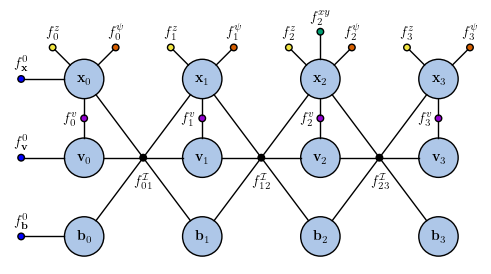

In [4]:
for i in range(4):
    x_pos = start_x + (i * col_spacing)
    
    pgm.add_node(f"dvl{i}", f"$f^{{v}}_{{{i}}}$", x_pos, 2.5, fixed=True, offset=[-10, -8], plot_params=style_factor_dvl)
    pgm.add_edge(f"x{i}", f"dvl{i}")
    pgm.add_edge(f"v{i}", f"dvl{i}")

pgm.render()
pgm.figure.savefig("fgo_dvl_binary.pdf", bbox_inches="tight")
pgm.figure.savefig("fgo_dvl_binary.png", bbox_inches="tight", dpi=300)

# for i in range(4):
#     x_pos = start_x + (i * col_spacing)

#     if i < 3:
#         mid_x = x_pos + (col_spacing / 2)

#         pgm.add_node(f"dvlb{i}", f"$f^\\mathcal{{D}}_{{{i}{i+1}}}$", mid_x, 3, fixed=True, plot_params=style_factor_dvl, offset=[0, 3])
#         pgm.add_edge(f"x{i}", f"dvlb{i}")
#         pgm.add_edge(f"dvlb{i}", f"x{i+1}")

# pgm.render()
# pgm.figure.savefig("fgo_dvl_between.pdf", bbox_inches="tight")
# pgm.figure.savefig("fgo_dvl_between.png", bbox_inches="tight", dpi=300)